In [1]:
import random
import matplotlib.pyplot as plt
import statistics

In [2]:
def simular_precos_imovel(precoInicial, numAnos, numSimulacoes, taxaCresclocalizacao, taxaJuros, investimentos):
    resultados_finais = []

    # Pega o valor de crescimentos da região no ultimo ano + a possibilidade de crescimento nos próximos 5
    valorizacaoLocalizacao = taxaCresclocalizacao

    for _ in range(numSimulacoes):

        preco = precoInicial

        for ano in range(numAnos):
            # Simular inflação (entre 5% e 7%) ao ano
            inflacao = random.uniform(0.05, 0.07)
            
            # Simular depreciação (entre -1% e -4%)
            depreciacao = random.uniform(-0.04, -0.01)

            # Pega o valor de crescimentos da região no ultimo ano + a possibilidade de crescimento nos próximos 5
            valorizacaoLocalizacao = random.uniform(0, 0.05)
            
            # Simular valorização com surgimento de comércios (-2% a 5%)
            comercio = random.uniform(-0.02, 0.05)
            
            # Crescimento populacional (maior demanda valoriza mais), seja por vir ou sair mais pessoas ou natalidade mesmo
            investimentos = investimentos * random.uniform(-0.02, 0.05) # de 0,01% ~ 0,1

            # O impacto da taxa de juros no valor do imovel
            if taxaJuros > 0.05:
                impactoJuros = -0.03
            else:
                impactoJuros = 0.03
            
            # Calcular o valor do imóvel após esse ano
            preco *= (1 + inflacao + depreciacao + comercio + investimentos + valorizacaoLocalizacao + impactoJuros)
        
        resultados_finais.append(preco)  # Agora estamos armazenando os preços em reais
    
    return resultados_finais

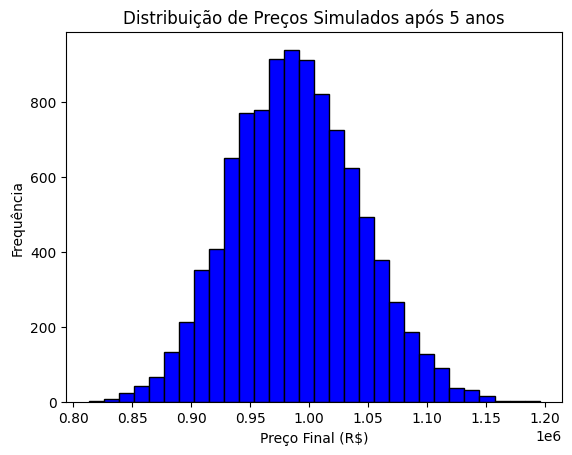

In [32]:
# Parâmetros inicias para executar a função
precoInicial = 600000
numAnos = 5
numSimulacoes = 10000
localizacao = 0.02  # Bairro valorizado
investimentos = 0.10 # quanto foi investido no projeto desde o inicio
taxaJuros = 0.04  # Taxa de juros atual (4%)

# Simulando o preço de um imóvel de R$ 600.000 ao longo de 5 anos com 10000 simulações
precosFinais = simular_precos_imovel(precoInicial, numAnos, numSimulacoes, localizacao, taxaJuros, investimentos)


plt.hist(precosFinais, bins=30, color='blue', edgecolor='black')
plt.title(f"Distribuição de Preços Simulados após {numAnos} anos")
plt.xlabel("Preço Final (R$)")
plt.ylabel("Frequência")
plt.show()

In [34]:
somaValores = sum(precosFinais)
quantidade = len(precosFinais)
mediana = statistics.median(precosFinais)
moda = statistics.mode(precosFinais)

print("Média: ", "{:.2f}".format(somaValores/quantidade))
print("mediana: ", "{:.2f}".format(mediana))
print("Moda: ", "{:.2f}".format(moda))

Média:  988855.70
mediana:  987594.57
Média:  1068369.57
